param_num: 11650
[0, 1.1218490600585938, 2.2436981201171875, 3.3655471801757812, 4.487396240234375, 5.609245300292969, 6.7310943603515625, 7.852943420410156, 8.97479248046875, 10.096641540527344, 11.218490600585938, 12.340339660644531, 13.462188720703125, 14.584037780761719, 15.705886840820312, 16.827735900878906, 17.9495849609375, 19.071434020996094, 20.193283081054688, 21.31513214111328, 22.436981201171875, 23.55883026123047, 24.680679321289062, 25.802528381347656, 26.92437744140625, 28.046226501464844, 29.168075561523438, 30.28992462158203, 31.411773681640625, 32.53362274169922, 33.65547180175781, 34.777320861816406, 35.899169921875, 37.021018981933594, 38.14286804199219, 39.26471710205078, 40.386566162109375, 41.50841522216797, 42.63026428222656, 43.752113342285156, 44.87396240234375, 45.995811462402344, 47.11766052246094, 48.23950958251953, 49.361358642578125, 50.48320770263672, 51.60505676269531, 52.726905822753906]
param_num: 26114
[0, 13.086334737141927, 26.172669474283854, 39.

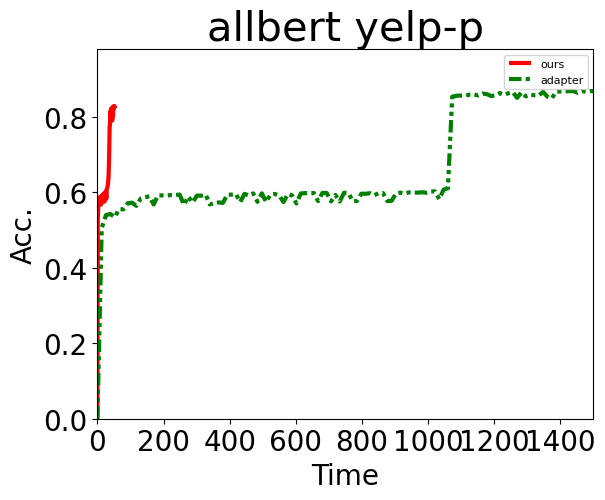

In [1]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "yelp-p"
model = "allbert"

logging_file = {
    "ours":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/albert_yelp-p/fedFwd_albert_yelp-p_lr0.01_client_num_1000_numerical_bitfit.log",
    "adapter":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/albert_yelp-p/fedsgd_albert_yelp-p_lr0.01_client_num_10_lora.log",
    # "bitfit":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/distilbert_yelp-p/fedsgd_distilbert_yelp-p_lr0.01_client_num_10_bitfit.log",
    # "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/distilbert_yelp-p/fedsgd_distilbert_yelp-p_lr0.01_client_num_10_full.log"
}

train_time_dict = {"ours":1,"adapter":12,"bitfit":12,"full":20}
local_data_num_dict = {"agnews":15,"yahoo":18,"yelp-p":65}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,1500)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"{model} {dataset}",fontsize=30)
plt.show()

param_num: 11650
[0, 8.705182393391928, 17.410364786783855, 26.11554718017578, 34.82072957356771, 43.52591196695964, 52.23109436035157, 60.9362767537435, 69.64145914713542, 78.34664154052734, 87.05182393391927, 95.75700632731119, 104.46218872070311, 113.16737111409503, 121.87255350748696, 130.57773590087888, 139.28291829427081, 147.98810068766275, 156.6932830810547, 165.39846547444662, 174.10364786783856, 182.8088302612305, 191.51401265462243, 200.21919504801437, 208.9243774414063, 217.62955983479824, 226.33474222819018, 235.03992462158212, 243.74510701497405, 252.450289408366, 261.1554718017579, 269.86065419514983, 278.56583658854174, 287.27101898193365, 295.97620137532556, 304.68138376871747, 313.3865661621094, 322.0917485555013, 330.7969309488932, 339.5021133422851, 348.207295735677, 356.9124781290689, 365.6176605224608, 374.32284291585273, 383.02802530924464, 391.73320770263655, 400.43839009602846, 409.14357248942036]
param_num: 26114
[0, 13.086334737141927, 26.172669474283854, 39.

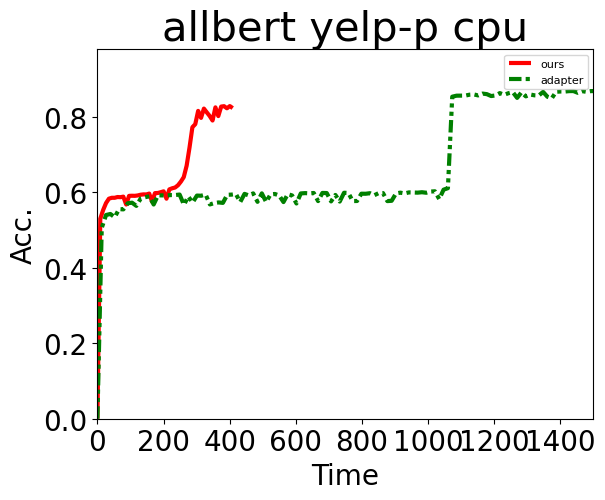

In [3]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "yelp-p"
model = "allbert"

logging_file = {
    "ours":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/albert_yelp-p/fedFwd_albert_yelp-p_lr0.01_client_num_1000_numerical_bitfit.log",
    "adapter":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/albert_yelp-p/fedsgd_albert_yelp-p_lr0.01_client_num_10_lora.log",
    # "bitfit":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/distilbert_yelp-p/fedsgd_distilbert_yelp-p_lr0.01_client_num_10_bitfit.log",
    # "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/distilbert_yelp-p/fedsgd_distilbert_yelp-p_lr0.01_client_num_10_full.log"
}

train_time_dict = {"ours":8,"adapter":12,"bitfit":12,"full":20}
local_data_num_dict = {"agnews":15,"yahoo":18,"yelp-p":65}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,1500)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"{model} {dataset} cpu",fontsize=30)
plt.show()